In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tkinter import *
from tkinter import messagebox

In [2]:
matches = pd.read_csv("matches.csv")
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
matches = matches[matches['dl_applied']!=1]

In [4]:
matches = matches.drop(['Season','date','team1', 'team2', 'toss_winner',
       'toss_decision','result','dl_applied','win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],axis=1)
matches

,id,city,winner
0,1,Hyderabad,Sunrisers Hyderabad
1,2,Pune,Rising Pune Supergiant
2,3,Rajkot,Kolkata Knight Riders
3,4,Indore,Kings XI Punjab
4,5,Bangalore,Royal Challengers Bangalore
...,...,...,...
751,11347,Mumbai,Mumbai Indians
752,11412,Chennai,Mumbai Indians
753,11413,Visakhapatnam,Delhi Capitals
754,11414,Visakhapatnam,Chennai Super Kings


In [5]:
deliveries = pd.read_csv("deliveries.csv")
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [6]:
deliveries['temp'] = deliveries['bye_runs']+deliveries['legbye_runs']+deliveries['wide_runs']
deliveries.loc[deliveries['temp']>0,'batsman_runs']=0


In [7]:
deliveries['total_runs'] = deliveries[['batsman_runs', 'extra_runs']].sum(axis=1)

In [8]:
deliveries = deliveries.drop(['batsman','non_striker','bowler','is_super_over','wide_runs','bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs','batsman_runs', 'extra_runs', 'dismissal_kind', 'fielder'],axis=1)


In [9]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,temp
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,4,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,2,NaN,2
...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,NaN,0
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,NaN,0
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,SR Watson,0
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,2,NaN,0


In [10]:
df = deliveries.merge(matches, left_on="match_id", right_on="id", how="inner").drop(['id'],axis=1)
df

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,temp,city,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,NaN,0,Hyderabad,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,NaN,0,Hyderabad,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,4,NaN,0,Hyderabad,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,NaN,0,Hyderabad,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,2,NaN,2,Hyderabad,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,NaN,0,Hyderabad,Mumbai Indians
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,NaN,0,Hyderabad,Mumbai Indians
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,SR Watson,0,Hyderabad,Mumbai Indians
175868,11415,2,Chennai Super Kings,Mumbai Indians,20,5,2,NaN,0,Hyderabad,Mumbai Indians


In [11]:
target_df = df.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

target_df = target_df[target_df['inning']==1]
target_df['total_runs'] = target_df['total_runs']+1
target_df

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\2073892727.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  target_df = df.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1480,11347,1,135
1482,11412,1,135
1484,11413,1,164
1486,11414,1,149


In [12]:
df = df.merge(target_df[['match_id','total_runs']], left_on='match_id', right_on='match_id')
df

,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,4,NaN,0,Hyderabad,Sunrisers Hyderabad,208
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,2,NaN,2,Hyderabad,Sunrisers Hyderabad,208
...,...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,NaN,0,Hyderabad,Mumbai Indians,150
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,NaN,0,Hyderabad,Mumbai Indians,150
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,SR Watson,0,Hyderabad,Mumbai Indians,150
175868,11415,2,Chennai Super Kings,Mumbai Indians,20,5,2,NaN,0,Hyderabad,Mumbai Indians,150


In [13]:
df = df[df['inning']==2]
df

,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,NaN,0,Hyderabad,Sunrisers Hyderabad,208
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,NaN,0,Hyderabad,Sunrisers Hyderabad,208
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,NaN,0,Hyderabad,Sunrisers Hyderabad,208
...,...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,NaN,0,Hyderabad,Mumbai Indians,150
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,NaN,0,Hyderabad,Mumbai Indians,150
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,SR Watson,0,Hyderabad,Mumbai Indians,150
175868,11415,2,Chennai Super Kings,Mumbai Indians,20,5,2,NaN,0,Hyderabad,Mumbai Indians,150


In [14]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
team = ['Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Delhi Capitals']

In [16]:
df['batting_team'] = df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['batting_team'] = df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\3903983089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batting_team'] = df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\3903983089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batting_team'] = df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')


In [17]:
df['bowling_team'] = df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['bowling_team'] = df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\2720930712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bowling_team'] = df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\2720930712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bowling_team'] = df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')


In [18]:
df = df[df['batting_team'].isin(team)]
df = df[df['bowling_team'].isin(team)]

In [19]:
df['balls_remaining'] = 120 - ((df['over']-1)*6+df['ball'])
df

,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y,balls_remaining
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,NaN,0,Hyderabad,Sunrisers Hyderabad,208,119
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208,118
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208,117
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,NaN,0,Hyderabad,Sunrisers Hyderabad,208,116
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,NaN,0,Hyderabad,Sunrisers Hyderabad,208,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,NaN,0,Hyderabad,Mumbai Indians,150,4
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,NaN,0,Hyderabad,Mumbai Indians,150,3
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,SR Watson,0,Hyderabad,Mumbai Indians,150,2
175868,11415,2,Chennai Super Kings,Mumbai Indians,20,5,2,NaN,0,Hyderabad,Mumbai Indians,150,1


In [20]:
df = df[df['balls_remaining']!=0]
df

,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y,balls_remaining
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,NaN,0,Hyderabad,Sunrisers Hyderabad,208,119
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208,118
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208,117
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,NaN,0,Hyderabad,Sunrisers Hyderabad,208,116
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,NaN,0,Hyderabad,Sunrisers Hyderabad,208,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175864,11415,2,Chennai Super Kings,Mumbai Indians,20,1,1,NaN,0,Hyderabad,Mumbai Indians,150,5
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,NaN,0,Hyderabad,Mumbai Indians,150,4
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,NaN,0,Hyderabad,Mumbai Indians,150,3
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,SR Watson,0,Hyderabad,Mumbai Indians,150,2


In [21]:
df['runs'] = df.groupby('match_id').cumsum()['total_runs_x']
df['runs_remaining'] = df['total_runs_y']-df['runs']
df

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\138802541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['runs'] = df.groupby('match_id').cumsum()['total_runs_x']
C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\138802541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runs'] = df.groupby('match_id').cumsum()['total_runs_x']
C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\138802541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y,balls_remaining,runs,runs_remaining
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,NaN,0,Hyderabad,Sunrisers Hyderabad,208,119,1,207
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208,118,1,207
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,NaN,0,Hyderabad,Sunrisers Hyderabad,208,117,1,207
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,NaN,0,Hyderabad,Sunrisers Hyderabad,208,116,3,205
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,NaN,0,Hyderabad,Sunrisers Hyderabad,208,115,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175864,11415,2,Chennai Super Kings,Mumbai Indians,20,1,1,NaN,0,Hyderabad,Mumbai Indians,150,5,142,8
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,NaN,0,Hyderabad,Mumbai Indians,150,4,143,7
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,NaN,0,Hyderabad,Mumbai Indians,150,3,145,5
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,SR Watson,0,Hyderabad,Mumbai Indians,150,2,146,4


In [22]:
df['player_dismissed'] = df['player_dismissed'].fillna(0)
df

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\3624825003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].fillna(0)


,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y,balls_remaining,runs,runs_remaining
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,0,Hyderabad,Sunrisers Hyderabad,208,119,1,207
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,0,Hyderabad,Sunrisers Hyderabad,208,118,1,207
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,0,Hyderabad,Sunrisers Hyderabad,208,117,1,207
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,0,Hyderabad,Sunrisers Hyderabad,208,116,3,205
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,0,Hyderabad,Sunrisers Hyderabad,208,115,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175864,11415,2,Chennai Super Kings,Mumbai Indians,20,1,1,0,0,Hyderabad,Mumbai Indians,150,5,142,8
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,0,Hyderabad,Mumbai Indians,150,4,143,7
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,0,Hyderabad,Mumbai Indians,150,3,145,5
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,SR Watson,0,Hyderabad,Mumbai Indians,150,2,146,4


In [23]:
df.loc[df['player_dismissed']!=0,'player_dismissed']=1
df

,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y,balls_remaining,runs,runs_remaining
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,0,Hyderabad,Sunrisers Hyderabad,208,119,1,207
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,0,Hyderabad,Sunrisers Hyderabad,208,118,1,207
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,0,Hyderabad,Sunrisers Hyderabad,208,117,1,207
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,0,Hyderabad,Sunrisers Hyderabad,208,116,3,205
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,0,Hyderabad,Sunrisers Hyderabad,208,115,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175864,11415,2,Chennai Super Kings,Mumbai Indians,20,1,1,0,0,Hyderabad,Mumbai Indians,150,5,142,8
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,0,Hyderabad,Mumbai Indians,150,4,143,7
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,0,Hyderabad,Mumbai Indians,150,3,145,5
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,0,Hyderabad,Mumbai Indians,150,2,146,4


In [24]:
df['player_dismissed'] = df['player_dismissed'].astype('int')

df

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\935433016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')


,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y,balls_remaining,runs,runs_remaining
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,0,Hyderabad,Sunrisers Hyderabad,208,119,1,207
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,0,Hyderabad,Sunrisers Hyderabad,208,118,1,207
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,0,Hyderabad,Sunrisers Hyderabad,208,117,1,207
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,0,Hyderabad,Sunrisers Hyderabad,208,116,3,205
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,0,Hyderabad,Sunrisers Hyderabad,208,115,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175864,11415,2,Chennai Super Kings,Mumbai Indians,20,1,1,0,0,Hyderabad,Mumbai Indians,150,5,142,8
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,0,Hyderabad,Mumbai Indians,150,4,143,7
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,0,Hyderabad,Mumbai Indians,150,3,145,5
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,0,Hyderabad,Mumbai Indians,150,2,146,4


In [25]:
df['wickets'] = df.groupby('match_id').cumsum()['player_dismissed']
df.tail()

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\579665725.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['wickets'] = df.groupby('match_id').cumsum()['player_dismissed']
C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\579665725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wickets'] = df.groupby('match_id').cumsum()['player_dismissed']


,match_id,inning,batting_team,bowling_team,over,ball,total_runs_x,player_dismissed,temp,city,winner,total_runs_y,balls_remaining,runs,runs_remaining,wickets
175864,11415,2,Chennai Super Kings,Mumbai Indians,20,1,1,0,0,Hyderabad,Mumbai Indians,150,5,142,8,5
175865,11415,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,0,Hyderabad,Mumbai Indians,150,4,143,7,5
175866,11415,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,0,Hyderabad,Mumbai Indians,150,3,145,5,5
175867,11415,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,0,Hyderabad,Mumbai Indians,150,2,146,4,6
175868,11415,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,0,Hyderabad,Mumbai Indians,150,1,148,2,6


C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\143141492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wicket.iloc[i] -= wicket.iloc[i-1]


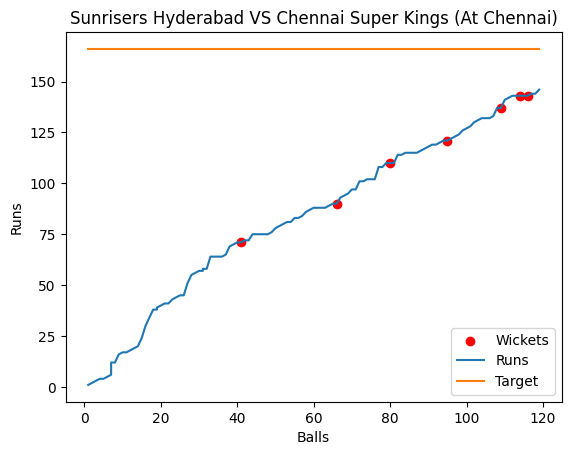

In [26]:
%matplotlib inline
x = np.random.choice(df.match_id.unique())
x_df = df[df['match_id']==x]
balls = 120-x_df['balls_remaining']
runs = x_df['runs']
target = x_df['total_runs_y']
wicket = x_df['wickets']
for i in range(len(wicket)-1,0,-1):
    wicket.iloc[i] -= wicket.iloc[i-1]
wicket = wicket*runs
tempp = balls[wicket.astype('bool')]

plt.scatter(tempp,wicket[wicket.astype('bool')],color='red', label="Wickets")
plt.plot(balls,runs, label="Runs")
plt.plot(balls,target, label="Target")
plt.title(f"{x_df['batting_team'].iloc[0]} VS {x_df['bowling_team'].iloc[0]} (At {x_df['city'].iloc[0]})")
plt.xlabel("Balls")
plt.ylabel("Runs")
plt.legend()
plt.show()

In [27]:
df = df[['batting_team','bowling_team','city','winner','total_runs_y','balls_remaining','runs','wickets']]

In [28]:
df.rename(columns = {'total_runs_y':'target'}, inplace = True)
df

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\3923013840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'total_runs_y':'target'}, inplace = True)


,batting_team,bowling_team,city,winner,target,balls_remaining,runs,wickets
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,119,1,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,118,1,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,117,1,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,116,3,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,115,7,0
...,...,...,...,...,...,...,...,...
175864,Chennai Super Kings,Mumbai Indians,Hyderabad,Mumbai Indians,150,5,142,5
175865,Chennai Super Kings,Mumbai Indians,Hyderabad,Mumbai Indians,150,4,143,5
175866,Chennai Super Kings,Mumbai Indians,Hyderabad,Mumbai Indians,150,3,145,5
175867,Chennai Super Kings,Mumbai Indians,Hyderabad,Mumbai Indians,150,2,146,6


In [29]:
def result(row):
    return 1 if (row['batting_team'] == row['winner']) else 0
df['result'] = df.apply(result,axis=1)
df

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\859286336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result'] = df.apply(result,axis=1)


,batting_team,bowling_team,city,winner,target,balls_remaining,runs,wickets,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,119,1,0,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,118,1,0,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,117,1,0,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,116,3,0,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,Sunrisers Hyderabad,208,115,7,0,0
...,...,...,...,...,...,...,...,...,...
175864,Chennai Super Kings,Mumbai Indians,Hyderabad,Mumbai Indians,150,5,142,5,0
175865,Chennai Super Kings,Mumbai Indians,Hyderabad,Mumbai Indians,150,4,143,5,0
175866,Chennai Super Kings,Mumbai Indians,Hyderabad,Mumbai Indians,150,3,145,5,0
175867,Chennai Super Kings,Mumbai Indians,Hyderabad,Mumbai Indians,150,2,146,6,0


In [30]:
df = df.drop(['winner'],axis=1)

In [31]:
city = list(df['city'].dropna().unique())

In [32]:
df = df.reset_index()
df = df.drop('index',axis=1)
df

,batting_team,bowling_team,city,target,balls_remaining,runs,wickets,result
0,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,208,119,1,0,0
1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,208,118,1,0,0
2,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,208,117,1,0,0
3,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,208,116,3,0,0
4,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,208,115,7,0,0
...,...,...,...,...,...,...,...,...
72167,Chennai Super Kings,Mumbai Indians,Hyderabad,150,5,142,5,0
72168,Chennai Super Kings,Mumbai Indians,Hyderabad,150,4,143,5,0
72169,Chennai Super Kings,Mumbai Indians,Hyderabad,150,3,145,5,0
72170,Chennai Super Kings,Mumbai Indians,Hyderabad,150,2,146,6,0


In [33]:
ohe = OneHotEncoder()
temp_df = ohe.fit_transform(df[['batting_team', 'bowling_team','city']])
temp_df = pd.DataFrame(temp_df.toarray(), columns=ohe.get_feature_names_out())

In [34]:
df = df[['target','balls_remaining','runs','wickets','result']]
df = pd.concat([df,temp_df],axis=1)
df

,target,balls_remaining,runs,wickets,result,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,...,city_Mohali,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Raipur,city_Ranchi,city_Sharjah,city_Visakhapatnam,city_nan
0,208,119,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,208,118,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,208,117,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,208,116,3,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,208,115,7,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72167,150,5,142,5,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72168,150,4,143,5,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72169,150,3,145,5,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72170,150,2,146,6,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X = df.drop('result',axis=1)
y = df['result']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [37]:

lr = LogisticRegression()

lr.fit(X_train,y_train)

# y_pred = rfc.predict(X_test)
lr.score(X_test,y_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


C:\Users\jethw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.816368002955847

In [38]:
data = X_test.copy()

In [39]:
team.remove("Deccan Chargers")
team.remove("Delhi Daredevils")

In [40]:
city = list(city)

In [41]:
root = Tk()
root.geometry("2000x2000")
root.title("CRICKET MATCH PREDICTION")

def run():
    global data
    tar = target_entry.get()
    sc = score_entry.get()
    wic = wicket_entry.get()
    over = over_entry.get()
    if tar.isdigit():
        tar = int(tar)
        if(tar==0):
            messagebox.showerror("Invalid Input", "Target cannot be zero")
            return        
    else:
        messagebox.showerror("Invalid Input", "Target must be a number")
        return
    if sc.isdigit():
        sc = int(sc)
    else:
        messagebox.showerror("Invalid Input", "Runs must be a number")
        return
    if wic.isdigit():
        wic = int(wic)
        if wic>10:
            messagebox.showerror("Invalid Input", "Wickets cannot be greater than 10")
            return
    else:
        messagebox.showerror("Invalid Input", "Wickets must be a number")
        return
    try:
        over = float(over)
        over1 = int(over)
        over2 = round(over-over1,5)
        if over1<0 or over1>20:
            messagebox.showerror("Error", "Invalid Input in over field")
            return
        if over1==20 and over2!=0:
            messagebox.showerror("Error", "Invalid Input in over field")
            return
        if over2 not in [0.0,0.1,0.2,0.3,0.4,0.5]:
            messagebox.showerror("Error", "Invalid Input in over field")
            return
        ballsremain = 120 - (over1*6 + over2*10)
    except:
        messagebox.showerror("Error", "Invalid Input in over field")
        return
    
    if over1 == 20 and over2 == 0:
        messagebox.showinfo("Note", "Match has already ended")
        return
    
    if sc>=tar:
        messagebox.showinfo("Note", "Match has already ended")
        return
    
    if wic==10:
        messagebox.showinfo("Note", "Match has already ended")
        return
    
    battingteam = bat.get()
    bowlingteam = bowl.get()
    if battingteam==bowlingteam or battingteam=="" or bowlingteam=="":
        messagebox.showerror("Error", "Please select two different teams")
        return
    
    batting = "batting_team_"+battingteam
    bowling = "bowling_team_"+bowlingteam
    ground = "city_"+venue.get()
    if ground=="city_":
        messagebox.showerror("Error", "Please select a city")
        return
    data = data[0:0]
    data = data.append({'target':tar, 'balls_remaining':ballsremain, 'runs': sc, 'wickets': wic, batting: 1, bowling: 1, ground: 1}, ignore_index=True)
    data = data.fillna(0)
    prob = lr.predict_proba(data)[0]
    messagebox.showinfo("Win Probability",f"{battingteam} : {round(prob[1]*100,2)}\n{bowlingteam} : {round(prob[0]*100,2)}")
    
        
l = Label(root,text="Cricket Match Prediction", font=("Times New Roman",15), foreground="red")
l.grid(row=0,column=0, columnspan=8)


target = Label(root, text="Enter Target: ")
target.grid(row=1, column=0)
target_entry = Entry(root)
target_entry.grid(row=1, column=1)

score_label = Label(root, text="Enter Runs: ")
score_label.grid(row=1, column=2)
score_entry = Entry(root)
score_entry.grid(row=1, column=3)

wicket_label = Label(root, text="Enter Wickets: ")
wicket_label.grid(row=1, column=4)
wicket_entry = Entry(root)
wicket_entry.grid(row=1, column=5)

over_label = Label(root, text="Enter Overs: ")
over_label.grid(row=1, column=6)
over_entry = Entry(root)
over_entry.grid(row=1, column=7)


t = Label(root, text="Select the batting and bowling team for second inning")
t.grid(row=2, column=0, columnspan=2)

t1 = Label(root, text="Batting Team")
t1.grid(row=3, column=0)
t1 = Label(root, text="Bowling Team")
t1.grid(row=3, column=1)
c = 4
bat = StringVar()
bowl = StringVar()
venue = StringVar()
for i in team:
    o = Radiobutton(root, text=i, value=i, variable=bat)
    o.grid(row=c,column=0)
    o = Radiobutton(root, text=i, value=i, variable=bowl)
    o.grid(row=c,column=1)
    c+=1
t1 = Label(root, text = "Select city")
t1.grid(row=c, column=0, columnspan=2)
c+=1
cc = 0
for i in city:
    o = Radiobutton(root, text = i, value = i, variable=venue)
    o.grid(row=c, column=cc)
    cc = 1-cc
    if cc==0: c+=1

c+=1
pred_button = Button(root, text="Predict Match Winning Probability", command=run)
pred_button.grid(row=c, column=0, columnspan=2)
    
root.mainloop()

C:\Users\jethw\AppData\Local\Temp\ipykernel_24560\4000590273.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'target':tar, 'balls_remaining':ballsremain, 'runs': sc, 'wickets': wic, batting: 1, bowling: 1, ground: 1}, ignore_index=True)
